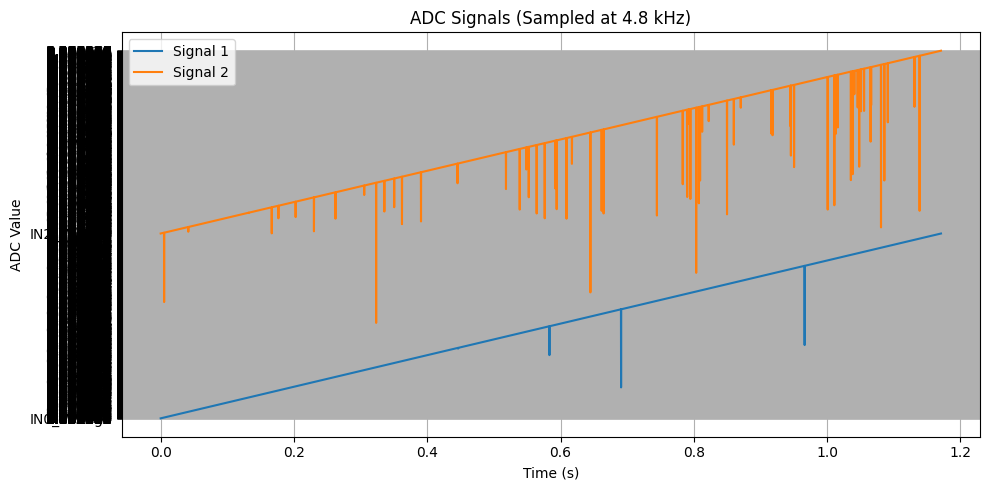

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Parameters
filename = 'adc_log.csv'
sampling_rate = 4800  # in Hz

# Load both columns (no header)
df = pd.read_csv(filename, header=None)
signal1 = df.iloc[:, 0]
signal2 = df.iloc[:, 1]

# Generate time axis
time = np.arange(len(signal1)) / sampling_rate  # in seconds

# Plot
plt.figure(figsize=(10, 5))
plt.plot(time, signal1, label='Signal 1')
plt.plot(time, signal2, label='Signal 2')
plt.xlabel('Time (s)')
plt.ylabel('ADC Value')
plt.title('ADC Signals (Sampled at 4.8 kHz)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


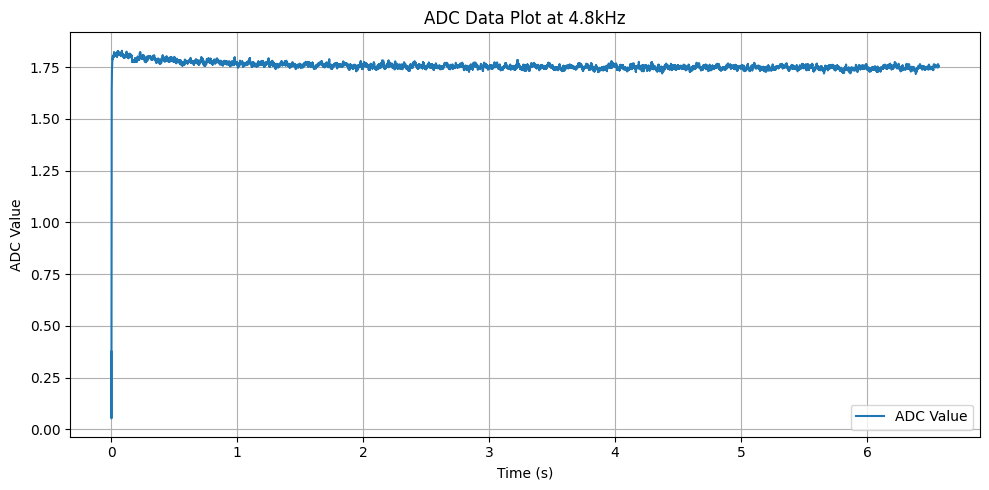

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Parameters
filename = 'adc_log.csv'
sampling_rate = 4800  # in Hz

# Load ADC values (single column)
adc_values = pd.read_csv(filename, header=None).squeeze()  # Convert to Series

# Generate time axis
time = np.arange(len(adc_values)) / sampling_rate  # in seconds

# Plot
plt.figure(figsize=(10, 5))
plt.plot(time, adc_values, label='ADC Value')
plt.xlabel('Time (s)')
plt.ylabel('ADC Value')
plt.title('ADC Data Plot at 4.8kHz')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
